<a href="https://colab.research.google.com/github/RanjanRaj07/Data-Science-Internship/blob/main/Task1/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic dataset classification
---
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
#pandas library read the data set file
import pandas as pd
#numpy for operations with array
import numpy as np
#handle local files with os
import os
#visualize data in graph using matplotlib.pyplot
import matplotlib.pyplot as plt
#plot single line simple graph using seaborn
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
train = pd.read_csv('Titanic-Dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### All columns are not important as they are unique
we can remove columns PassengerId, Name, Ticket which are unique values.

In [ ]:
#to display the basic stats about dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#to know about the datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#count the total survived and dead counts
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### So among 891 passengers only 342 Survived (549 not Survived).

## Exploratory Data Analysis
---
### i) categorical attributes

<Axes: xlabel='Survived', ylabel='count'>

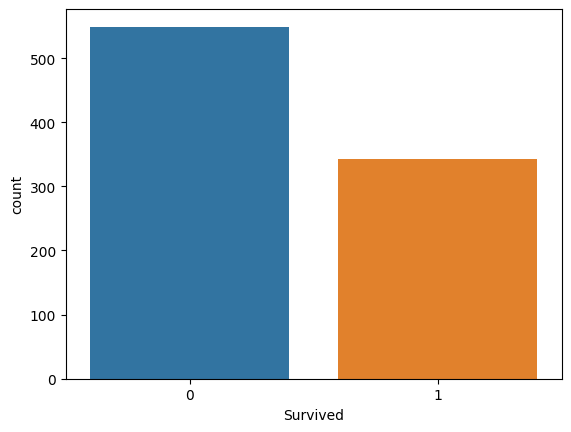

In [ ]:
sns.countplot(x=train['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

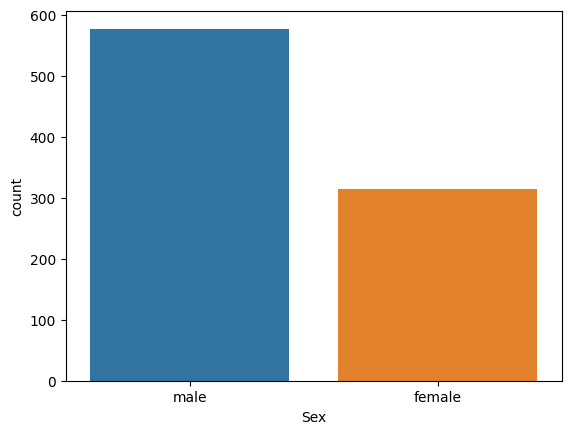

In [ ]:
sns.countplot(x=train['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

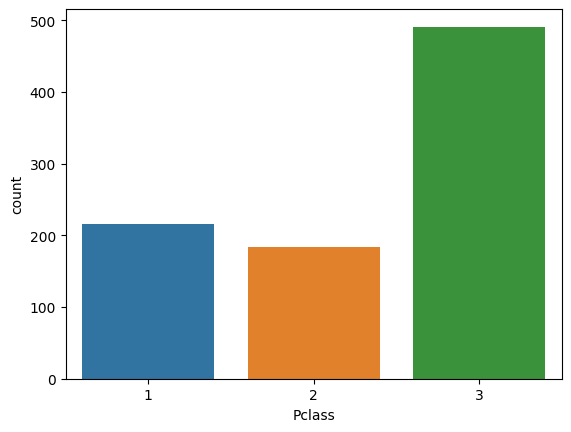

In [ ]:
sns.countplot(x=train['Pclass'])

<Axes: xlabel='SibSp', ylabel='count'>

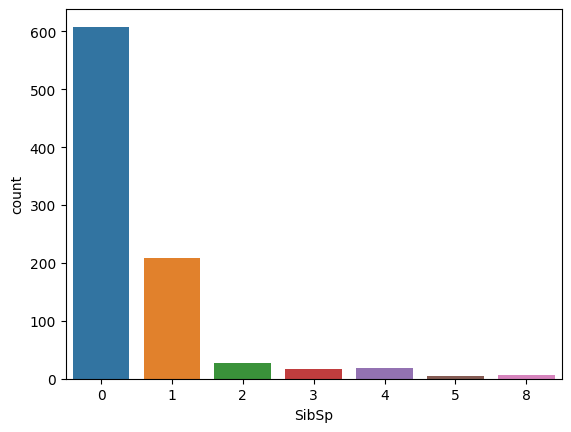

In [ ]:
sns.countplot(x=train['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

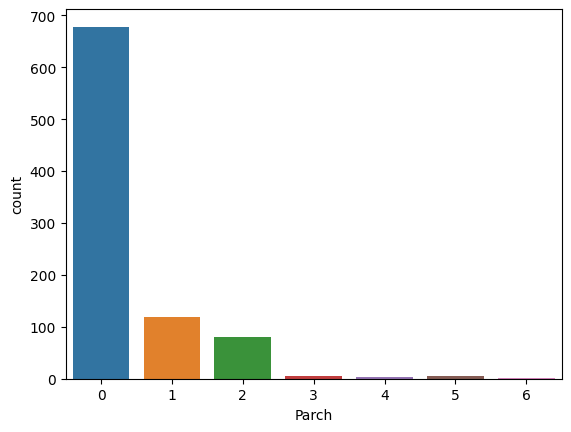

In [ ]:
sns.countplot(x=train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

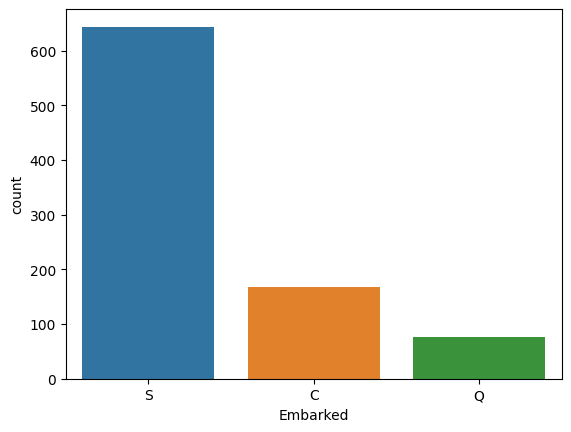

In [ ]:
sns.countplot(x=train['Embarked'])

In [ ]:
# sns.distplot() is a depricated function but looks good for visualization to use it ignore warnings
import warnings
warnings.filterwarnings('ignore')

### ii) numerical attributes

<Axes: ylabel='Density'>

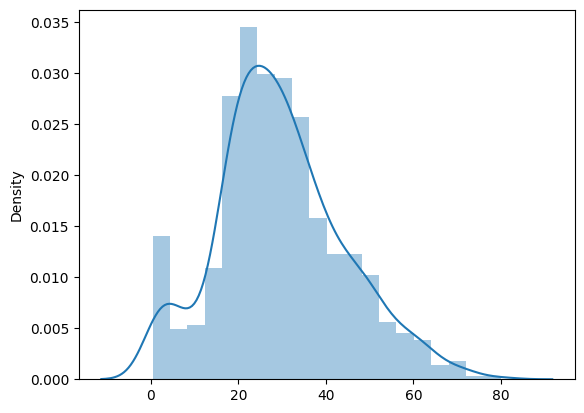

In [ ]:
sns.distplot(x=train['Age'])

<Axes: ylabel='Density'>

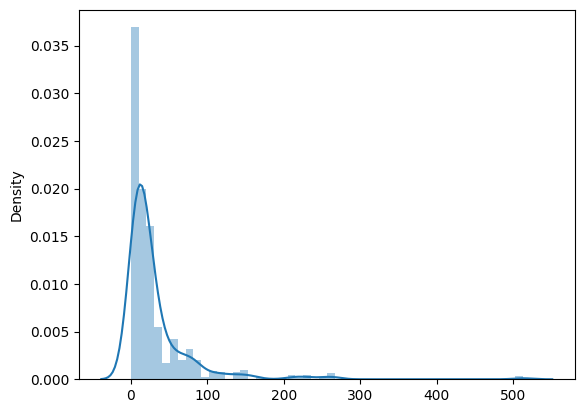

In [ ]:
sns.distplot(x=train['Fare'])

Text(0.5, 1.0, 'Avg. Fare v/s Class')

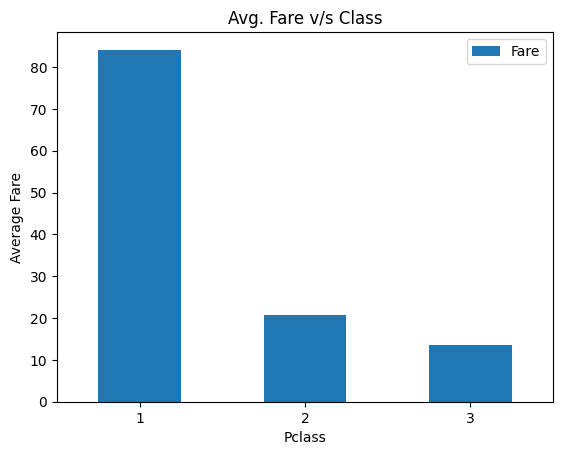

In [ ]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.ylabel('Average Fare')
plt.title('Avg. Fare v/s Class')

! we can observer that the Average fare of the first class is above \$80 and third class is around \$10 so there is peak in 0 to 50 in fare v/s count graph which indicate most of the passengers where in class 1.

Text(0.5, 1.0, 'Sum of Fare v/s Class')

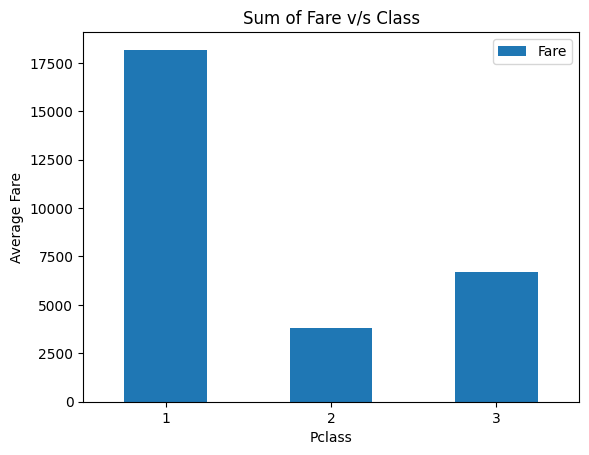

In [ ]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.ylabel('Average Fare')
plt.title('Sum of Fare v/s Class')

<Axes: xlabel='Pclass', ylabel='Fare'>

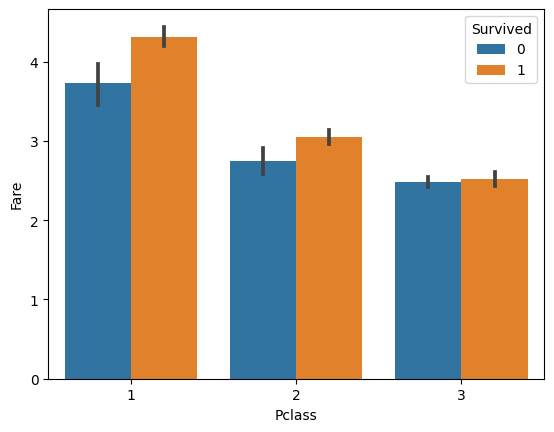

In [ ]:
#ploting relation of survival with Fare v/s Pclass
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

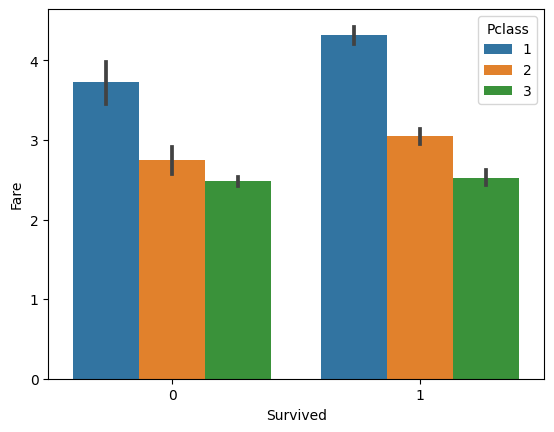

In [ ]:
#ploting relation of class with Fare v/s Survived
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

we can note tha more number of survivals are from class 1 it the reason i feel is since there were maximum number of passengers in class 1 there is maximum chance of survival from class 1.

## Data preprocessing
---

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#filling missing values
#fill mean for numerical values
train['Age']=train['Age'].fillna(train['Age'].mean())
#fill mode for categorical values
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [ ]:
#droping the unique values column PassengerId and maximum null values column Cabin
train=train.drop(columns=['PassengerId', 'Cabin'])

### Log transformation for uniform distribution of Fare data

<Axes: xlabel='Fare', ylabel='Density'>

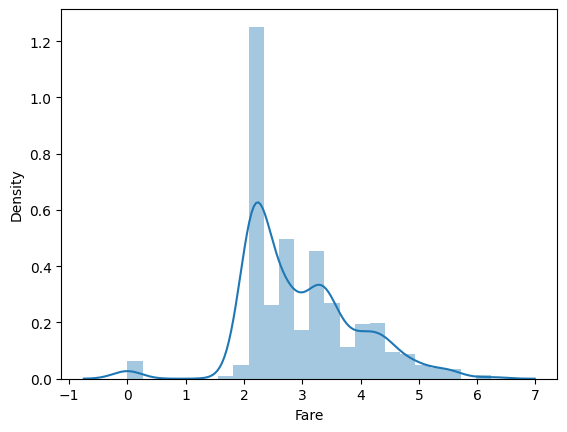

In [ ]:
train['Fare'] = np.log(train['Fare']+1)
sns.distplot(train['Fare'])

### Correlation Matrix
---

<Axes: >

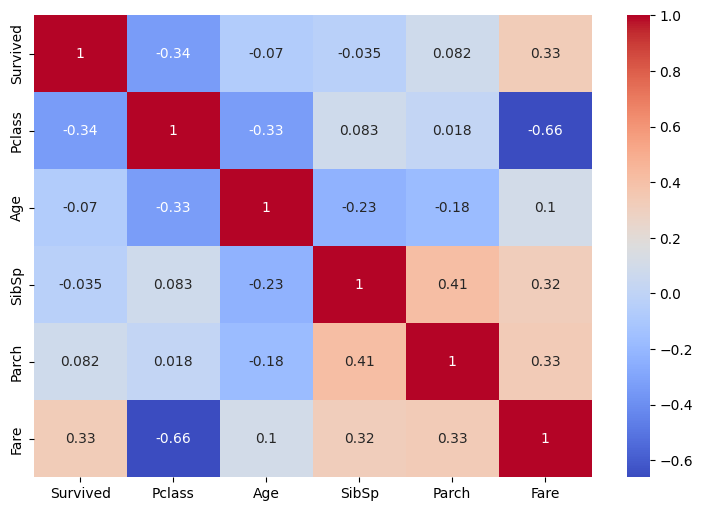

In [ ]:
corr = train.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We can note that Fare is having a correlation with most of the classes

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [ ]:
#drop name and Ticket
train = train.drop(columns=['Name', 'Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


### Lable Encoding Sex and Embarked data values

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()
for col in cols:
  train[col] = le.fit_transform(train[col])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


## Model Training
---

In [ ]:
X = train.drop(columns=['Survived'], axis=1)
Y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  model.fit(x_train, y_train)
  print('Accuracy:', model.score(x_test, y_test))

  score = cross_val_score(model, x, y, cv=5)
  print(score)
  print('CV Score:', np.mean(score))


In [ ]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy: 0.8071748878923767
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
CV Score: 0.7833971502102819


In [ ]:
#DecisionTresClassifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)


Accuracy: 0.7399103139013453
[0.73743017 0.74719101 0.78089888 0.74719101 0.82022472]
CV Score: 0.7665871571150588


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy: 0.8026905829596412
[0.77094972 0.79213483 0.84831461 0.7752809  0.8258427 ]
CV Score: 0.8025045508756511


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy: 0.7847533632286996
[0.78212291 0.76966292 0.83707865 0.7752809  0.80337079]
CV Score: 0.7935032326909799


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model, X, Y)

Accuracy: 0.7892376681614349
[0.7877095  0.81460674 0.84269663 0.78651685 0.83146067]
CV Score: 0.8125980792166217


In [ ]:
from lightgbm.sklearn import LGBMClassifier
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model, X, Y)

### Cross validation is best in LGBMClassifer model

In [ ]:
model = LGBMClassifier()
model.fit(X, Y)

In [ ]:
pred = model.predict(X)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.metrics import jaccard_score
similarity_score = jaccard_score(pred, Y)
similarity_score

0.8704225352112676

### Hence I can conclude that the model by lightgbm claissifer is 87.04% accurate in prediction of the surviving possibility of a passenger in Titanic dataset.